# Lab - Subset Selection Methods

# 6.5.1 Best Subset Selection

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
import imp

In [2]:
metricsUtil = imp.load_source('MetricsUtil','MetricsUtil.py')
# drop rows with nan values
data = pd.read_csv('Dataset\Hitters.csv', usecols=range(0,21)).dropna()
print(list(data.columns.values))

['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague']


In [3]:
data.head(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [4]:
X = pd.get_dummies(data.drop('Salary', axis=1).drop('Unnamed: 0', axis=1)).drop(["League_A", "Division_E", "NewLeague_A"], axis=1)
Y = data['Salary']

In [5]:
def process_subset(feature_set):
    d = len(feature_set)
    n = X.shape[0]
    # Fit model on feature_set  
    model = lm.LinearRegression().fit(X[[i for i in feature_set]], Y)
    Y_hat = model.predict(X[list(feature_set)])
    
    rss = metricsUtil.RSS(Y, Y_hat)  
    rsquared = metrics.r2_score(Y, Y_hat)

    # model = sm.OLS(Y,X[list(feature_set)])
    # regr = model.fit()
    A_rsquared = metricsUtil.A_rsquare(rss, Y, Y_hat, n, d)

    cp = metricsUtil.Cp(rss, d, Y_hat, n)
    bic = metricsUtil.Bic(n, rss, d, Y_hat)
   
    return {"model":model, 
            "RSS":rss,
            "features": feature_set,
            "rsquared": rsquared,
            "A_rsquared" : A_rsquared,
            "bic": bic,
            "cp":cp }

In [6]:
def best_subset_selection(k):
    results = []
    for combo in combinations(X.columns, k):
        results.append(process_subset(combo))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model


In [7]:
def backward_stepwise_selection(predictors):
    results = []
    # All combinations of predictors of the size of predictors -1, 
    for combo in combinations(predictors, len(predictors)-1):
        results.append(process_subset(combo))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model


In [8]:
def forward_stepwise_selection(predictors):
    #Identify predictors not already picked
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(process_subset(predictors+[p]))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [9]:
subsets = pd.DataFrame(columns=["RSS", "model", "features", "rsquared", "A_rsquared", "bic", "cp"])

In [10]:
print(subsets.count)

<bound method DataFrame.count of Empty DataFrame
Columns: [RSS, model, features, rsquared, A_rsquared, bic, cp]
Index: []>


In [11]:
predictors = []
#Best subset selection
for i in range(1,8):
    subsets.loc[i] = best_subset_selection(i)
    predictors = subsets.loc[i].features
    print(i)
    
print("features")
print(subsets.loc[7].features)

C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


1


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


2


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


3


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


4


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


5


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


6
7
features
('Hits', 'Walks', 'CAtBat', 'CHits', 'CHmRun', 'PutOuts', 'Division_W')


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


In [12]:
#Forward stepwise selection
predictors = []
for i in range(1, len(X.columns)+1):
    subsets.loc[i] = forward_stepwise_selection(predictors)
    predictors = subsets.loc[i].features

print("features")
print(subsets.loc[7].features)

C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel

features
['CRBI', 'Hits', 'PutOuts', 'Division_W', 'AtBat', 'Walks', 'CWalks']


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if __name__ == '__main__':


In [13]:
# #Backward stepwise selection
predictors = X.columns
while(len(predictors) > 1):
    subsets.loc[len(predictors)-1] = backward_stepwise_selection(predictors)
    predictors = subsets.loc[len(predictors)-1].features

print("features")
print(subsets.loc[7].features)

C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. T

features
('AtBat', 'Hits', 'Walks', 'CRuns', 'CWalks', 'PutOuts', 'Division_W')


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. T

In [14]:
rsquared = subsets.rsquared
RSS = subsets.RSS
bic = subsets.bic
cp = subsets.cp
features = subsets.features
A_rsquared = subsets.A_rsquared
print("features")
print(features)
print("RSS")
print(RSS)
print("Rsquared")
print(rsquared)
print("cp")
print(cp)
print("bic")
print(bic)

print("A_rsquared")
print(A_rsquared)


features
1                                              (CRuns,)
2                                         (Hits, CRuns)
3                                (Hits, CRuns, PutOuts)
4                         (AtBat, Hits, CRuns, PutOuts)
5                  (AtBat, Hits, Walks, CRuns, PutOuts)
6      (AtBat, Hits, Walks, CRuns, PutOuts, Division_W)
7     (AtBat, Hits, Walks, CRuns, CWalks, PutOuts, D...
8     (AtBat, Hits, Walks, CRuns, CRBI, CWalks, PutO...
9     (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
10    (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
11    (AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...
12    (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...
13    (AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...
14    (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CRun...
15    (AtBat, Hits, HmRun, Runs, Walks, CAtBat, CHit...
16    (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...
17    (AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...
18    (AtBat, Hits, HmRun, Runs, RBI, W

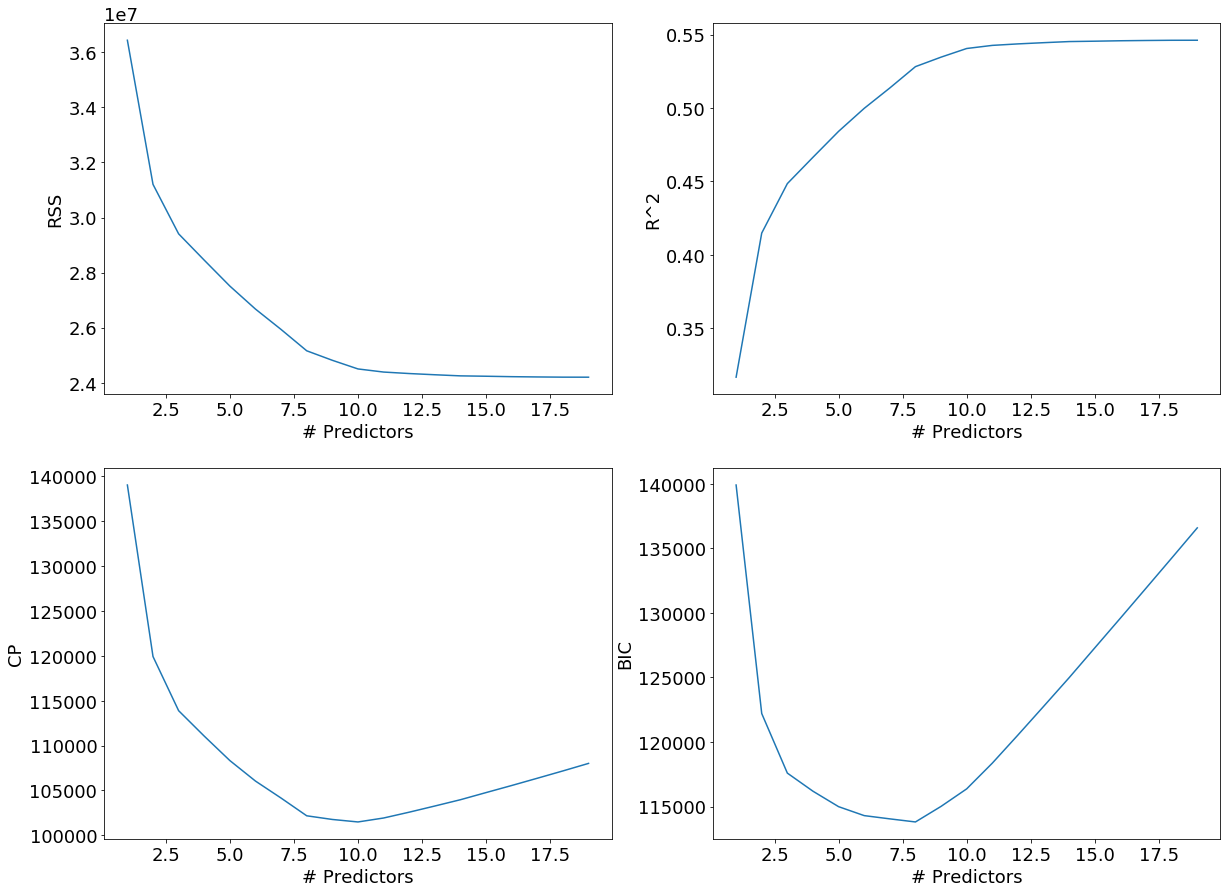

In [15]:
plt.figure(figsize = (20,15))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)
plt.plot(RSS)
plt.xlabel('# Predictors')
plt.ylabel('RSS')

plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.xlabel('# Predictors')
plt.ylabel('R^2')

plt.subplot(2, 2, 3)
plt.plot(cp)
plt.xlabel('# Predictors')
plt.ylabel('CP')

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.xlabel('# Predictors')
plt.ylabel('BIC')

plt.show()

# 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [16]:
import numpy as np
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.model_selection import train_test_split
from itertools import combinations
import matplotlib.pyplot as plt
import pylab
from sklearn import metrics
import math
import imp


In [17]:
metricsUtil = imp.load_source('MetricsUtil', 'MetricsUtil.py')

data = pd.read_csv('Dataset\Hitters.csv', usecols=range(0,21), parse_dates=True).dropna()

data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [18]:
def process_subset(feature_set, x_train, y_train, x_test, y_test ):
    d = len(feature_set)
    n = y_test.shape[0]
    # Fit model on feature_set  
    model = lm.LinearRegression().fit(x_train[[i for i in feature_set]], y_train)
    Y_hat = model.predict(x_test[list(feature_set)])
    
    rss = metricsUtil.RSS(y_test, Y_hat)  
    mse = metricsUtil.Mse(y_test, Y_hat)
    
    return {"model":model, 
            "RSS":rss,
            "features": feature_set,
            "mse": mse }

In [19]:
def best_subset_selection(k, x_train, y_train, x_test, y_test ):
    results = []
    for combo in combinations(x_train.columns, k):
        results.append(process_subset(combo, x_train, y_train, x_test, y_test))
    models = pd.DataFrame(results)
    #Choose best model based on RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

subsets = pd.DataFrame(columns=["RSS", "model", "features", "mse"])


In [20]:
# ********* Validation split ************
train, test = train_test_split(data, test_size = 0.5)

X_train = pd.get_dummies(train.drop('Salary', axis=1).drop('Unnamed: 0', axis=1)).drop(["League_A", "Division_E", "NewLeague_A"], axis=1)
Y_train = train['Salary']

X_test = pd.get_dummies(test.drop('Salary', axis=1).drop('Unnamed: 0', axis=1)).drop(["League_A", "Division_E", "NewLeague_A"], axis=1)
Y_test = test['Salary']

for i in range(1, 20):
    subsets.loc[i] = best_subset_selection(i, X_train, Y_train, X_test, Y_test)
    


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

In [21]:
# ***** Print  features and mse *****
RSS = subsets.RSS
features = subsets.features
mse = subsets.mse
print("features")
print( features)
print( "mse")
print( mse)
print( "rss")
print( RSS)

features
1                                               (CRBI,)
2                                          (Runs, CRBI)
3                              (Runs, CRBI, Division_W)
4                    (Runs, CRBI, League_N, Division_W)
5                (AtBat, Hits, Walks, CRBI, Division_W)
6        (AtBat, Hits, CAtBat, CRuns, CRBI, Division_W)
7     (AtBat, Hits, CAtBat, CRuns, CRBI, League_N, D...
8     (AtBat, Hits, CAtBat, CHmRun, CRuns, CRBI, Lea...
9     (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
10    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
11    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
12    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
13    (AtBat, Hits, HmRun, Runs, CAtBat, CHmRun, CRu...
14    (AtBat, Hits, HmRun, Runs, CAtBat, CHmRun, CRu...
15    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHmR...
16    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHit...
17    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHit...
18    (AtBat, Hits, HmRun, Runs, Walks,

In [22]:
# *****   Cross validation *******
X = pd.get_dummies(data.drop('Salary', axis=1).drop('Unnamed: 0', axis=1)).drop(["League_A", "Division_E", "NewLeague_A"], axis=1)
Y = data["Salary"]

kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)
j = 0
mse = np.zeros((kf.n_splits, 19))
for train_index, test_index in kf.split(X):
    print( "run")
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    for i in range(1, 20):
         subset = best_subset_selection(i, X_train, Y_train, X_test, Y_test)
         mse[j,i-1] = subset["mse"]
    j = j+1
print(mse.mean(axis=0))    


run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

run


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is depre

[119503.75306739  96892.03886921  88786.807814    84250.55894835
  81621.24252433  80309.4702923   79500.59729773  78977.07935332
  79123.51082386  79397.97857777  79834.54029633  81234.78199783
  83488.14396329  86939.39402946  90435.64650728  94174.42553754
  98724.37633832 107945.9377369  116999.29761632]


C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys
C:\Users\ida_s\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  import sys


In [23]:
# ***** Print  features and mse *****
RSS = subsets.RSS
features = subsets.features
mse = subsets.mse
print("features")
print( features)
print( "mse")
print( mse)
print( "rss")
print( RSS)

features
1                                               (CRBI,)
2                                          (Runs, CRBI)
3                              (Runs, CRBI, Division_W)
4                    (Runs, CRBI, League_N, Division_W)
5                (AtBat, Hits, Walks, CRBI, Division_W)
6        (AtBat, Hits, CAtBat, CRuns, CRBI, Division_W)
7     (AtBat, Hits, CAtBat, CRuns, CRBI, League_N, D...
8     (AtBat, Hits, CAtBat, CHmRun, CRuns, CRBI, Lea...
9     (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
10    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
11    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
12    (AtBat, Hits, HmRun, CAtBat, CHmRun, CRuns, CR...
13    (AtBat, Hits, HmRun, Runs, CAtBat, CHmRun, CRu...
14    (AtBat, Hits, HmRun, Runs, CAtBat, CHmRun, CRu...
15    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHmR...
16    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHit...
17    (AtBat, Hits, HmRun, Runs, Years, CAtBat, CHit...
18    (AtBat, Hits, HmRun, Runs, Walks,